In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/Datasets_Kaggle/dsotm_reviews.csv")
pd.options.display.max_colwidth = 200

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df.sample(10)


,Review,Rating
916,"""Emotividad pura musica sentimental en su explendor lo unico denso es on the run igual esta en mis favoritos""",5.0
1041,Obviously the greatest album ever.,3.5
980,Pure classic. A hypnotizing beggining a rushing middle a kick ass instrumental a really good ending. A must have for everyone.,5.0
344,notthebestalbumofalltime/10,3.5
893,Millions of people cannot be all wrong can they? Well folks I strongly advice you NOT to make the mistake of believing that quantity always produces quality. I like this album but it is a far cry ...,4.0
35,"""This is a record I should like right?nI was around in the 70s and I hated the crappy boy bands like Bay City Rollers and glam rock idols like GlitterBolan and The Sweet so a group of musicians wh...",1.0
441,"I once asked my friend Jimmy why Dark Side was his favorite album of all time (I hadnt yet figured out mine). He said this: ""Because the best type of album is a concept album and because the best ...",5.0
1127,Dark Side of the Moon belongs to those timeless albums which are the milestones in Rock History.nIt doesnt mean that this album is the best progressive music ever released.nIn 1973 Pink Floyd just...,5.0
566,Have listened to this countless times usually while tripping balls.nnGets better everytime.,5.0
1243,Best album of all times!!!,5.0


In [4]:
#drop nan values and reset index
df = df[(df['Review'].notna())]
df = df[(df['Rating'].notna())]
df = df.reset_index()
df

,index,Review,Rating
0,0,"""More has been said about Dark Side of the Moon than will ever be necessary both positive and negative. I see no reason to assess the albums actual music in this review as my fondness for it is li...",4.5
1,1,What can I possibly say about an album that not only means so much to so many and has influenced an equal number ... other then to tell you some personal stories regarding the album from my perspe...,5.0
2,2,You know for a band that spent several albums trying to atone for unceremoniously ousting its founder when his incredibly fertile mind became just that little bit overheated from LSD use Pink Floy...,2.0
3,3,Has finally clicked with me in full after 30 years absolutely smashing the previous record of 13 years set by Nevermind. Its never too late for you and an album kids.nn(Thats entirely to...,4.0
4,4,"So why are people afraid to say this isnt a masterpiece but is basically a well-crafted well-thought out AOR album with some unnecessary soupy stuff like ""On the Run"" and ""The Great Gig ...",4.5
...,...,...,...
1489,1543,"""Perhaps the best album of all time. Period. If you havent heard it then get it sit in a dark room and listen to it all the way through. Absolutely incredible...""",5.0
1490,1544,"""A very good experimental and psychedelic album with many different soundscapes and eerie feelings. This album runs together as a whole its difficult to listen to on shuffle or skipping tracks. Li...",4.5
1491,1545,What else is there to say Pink Floyd Darkside of the Moon. Honestly there is nothing else.,5.0
1492,1546,"Goes to show you should watch out for the ""classics"".nOn the Run is laughable 70s camp I mean just listen. What a horrible instrumental with keyboard sound. Its a bad nightmare trapped in a broken...",1.0


In [5]:
reviews = df.copy()[['Review']]
# data_text['index'] = data_text.index
# reviews = data_text

# Taking a first look at the data

In [6]:
reviews.sample(3)

,Review
1316,_Dark Side of The Moon_nnNo need for explanations on why this album rocks.nnFAVORITE SONG: All of themnREASON: They all rocknnLEAST-FAVORITE SONG: None of themnREASON: They all rock
1441,This is the greatest album of all time. If you dont give this 5 stars then something is wrong with you. And if you are one of those assholes that put one star or a half of a star or just call the ...
332,After 40 years this album still has it. Amazing sound innovative textures thought provoking lyrics an army of special effects rock prog light jazz soaring guitars mournful keyboards sax and an ast...


In [7]:
#there are reviews in the dataset in languages other than english, for the purpose of further analysis, we can translate the reviews and use them
reviews.loc[[258]]

,Review
258,Seguramente entre os cinco maiores albums de rock de todos os tempos Darkside of the Moon é o Pink Floyd em seu ápice eles gravaram outros albums maravilhosos mas esse é imbatível.Um alb...


In [8]:
!pip install langdetect
from langdetect import detect_langs
from langdetect import detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from langdetect import DetectorFactory

DetectorFactory.seed = 0
reviews['language'] = reviews['Review'].apply(lambda x: detect(x))
reviews.language.value_counts()

en    1348
es      44
fr      21
it      21
pl       9
pt       8
ru       7
ro       7
de       6
cy       3
tl       3
ca       3
ko       2
nl       2
hu       2
no       2
so       1
sv       1
da       1
uk       1
id       1
af       1
Name: language, dtype: int64

In [10]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import googletrans
from googletrans import Translator

translator = Translator()

#usage example
review = reviews['Review'].loc[[258]].values[0]
print('Original review: ',review)
result = translator.translate(review, dest='en')
print('Translated review: ',result.text)

Original review:            Seguramente entre os cinco maiores albums de rock de todos os tempos Darkside of the Moon é o Pink Floyd em seu ápice eles gravaram outros albums maravilhosos mas esse é imbatível.Um album revolucionário que até hoje é referência em qualidade de gravação.Uma das maiores obras de arte feitas pelo ser-humano.Deus abençoe o Pink Floyd.
Translated review:  Surely among the five greatest rock albums of all time Darkside of the Moon is Pink Floyd at their peak they recorded other wonderful albums but this one is unbeatable. A revolutionary album that is still a reference in recording quality. of art made by the human being. God bless Pink Floyd.


# Translating reviews 

In [12]:
def translate_reviews(df, col):
      translated = []
      for i in range(0, df.shape[0]):
            review = df[col].loc[[i]].values[0]
            if df['language'].loc[[i]].values[0]!='en':
                trans = translator.translate(review, dest='en')
                translated.append(trans.text)
            else:
                translated.append(review)
      return translated

In [13]:
reviews['translated_reviews'] = translate_reviews(reviews, 'Review')

In [14]:
reviews[reviews.language!='en']

,Review,language,translated_reviews
11,Nunca he sabido demasiado bien cómo afrontar este disco. Por un lado temía ser presa de los prejuicios ya fueran estos buenos o malos; por otro nunca me había visto capaz de puntuarlo ya...,es,"I've never really known how to deal with this album. On the one hand, she feared falling prey to prejudice, whether good or bad; on the other, I had never seen myself capable of scoring it either ..."
27,Una proesa sonora para la época en que el disco fue grabado. La calidad del sonido es increíble tan cristalino (solo por ejemplo tomo los relojes del comienzo de Time tal es el detalle que se pued...,es,"A sound prose for the time the album was recorded. The sound quality is incredible, so crystal clear (just for example I take the clocks from the beginning of Time, such is the detail that you can..."
29,"Voilà peut-être ce qui me dérange le plus là-dedans : cest une parfaite démonstration du mauvais préjugé que jai à propos de ce truc appelé ""prog"". Non mais ça devrait être interdit dutiliser des ...",fr,"This is perhaps what bothers me the most about it: it's a perfect demonstration of the wrong prejudice I have about this thing called ""prog"". No, but it should be forbidden to use such crude trick..."
31,Płyta na której Pink Floydzi dobitnie pokazali że pragną odciąć się od psychodelii na rzecz grania w miarę zwykłego rocka. Właściwie proces ten postępował już od jakiegoś czasu ale jeżeli pominąć ...,pl,"The album on which Pink Floydzi clearly showed that they want to cut themselves off from psychedelia in favor of playing as ordinary rock. In fact, this process has been going on for some time, bu..."
44,So-so.,so,So-so.
...,...,...,...
1371,great,ro,great
1385,Dull,af,Dull
1395,"aguante ""ANY COLOUR YOU LIKE"" y ""TIME""nY aguante CERCA DE LA REVOLUCION y INFLUENCIA del #1- Charly GarcíanTHE SMITHS APESTA",es,"endure ""ANY COLOR YOU LIKE"" and ""TIME""nY endure CLOSE TO THE REVOLUTION and INFLUENCE of #1- Charly GarcíanTHE SMITHS SUCKS"
1453,awsome,cy,awsome


# Preprocessing

In [15]:
np.random.seed(2022)
#nltk.download('omw-1.4')
#nltk.download('wordnet')
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

In [16]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    #text = text.replace('nn',' ')
    default_stopwords = gensim.parsing.preprocessing.STOPWORDS
    custom_stopwords = default_stopwords.union(set(["pink","floyd","moon","dark","side","one"]))
    for token in gensim.utils.simple_preprocess(text):
        if token not in custom_stopwords and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [17]:
#examples
print(preprocess(reviews['translated_reviews'].loc[0]))
print(lemmatize_stemming('albums'))

['say', 'necessari', 'posit', 'negat', 'reason', 'assess', 'album', 'actual', 'music', 'review', 'fond', 'like', 'root', 'reason', 'emot', 'peopl', 'rank', 'best', 'album', 'theyv', 'hear', 'feel', 'oblig', 'explain', 'critic', 'acclaim', 'album', 'fall', 'short', 'reput', 'eardrum', 'except', 'nnwere', 'ask', 'perfect', 'hypothet', 'album', 'think', 'respons', 'abl', 'come', 'respons', 'reflect', 'characterist', 'year', 'pass', 'knowledg', 'music', 'expand', 'learn', 'appreci', 'great', 'deal', 'sound', 'idea', 'bothersom', 'album', 'domin', 'speaker', 'perspect', 'music', 'listen', 'adapt', 'embrac', 'varieti', 'divers', 'origin', 'favorit', 'sound', 'date', 'tiresom', 'nndark', 'survivor', 'simpli', 'impact', 'defin', 'simpl', 'nostalgia', 'sound', 'structur', 'serv', 'core', 'explor', 'music', 'subconsci', 'contrast', 'music', 'unintent', 'allow', 'album', 'influenc', 'feel', 'album', 'grow', 'phase', 'reverber', 'felt', 'collect', 'truli', 'terribl', 'good', 'effect', 'album', 'li

In [18]:
preprocessed_reviews = reviews['translated_reviews'].map(preprocess)
reviews['preprocessed_reviews'] = preprocessed_reviews

In [19]:
reviews.sample(2)

,Review,language,translated_reviews,preprocessed_reviews
1092,PINK FLOYD GIVES US HERE THE BEST OF THE BEST.nTHE DARK SIDE OF THE MOON is more than an albummore than a masterpiece it is a concept and a way of thinking we all sometimes have.This album blow my...,en,PINK FLOYD GIVES US HERE THE BEST OF THE BEST.nTHE DARK SIDE OF THE MOON is more than an albummore than a masterpiece it is a concept and a way of thinking we all sometimes have.This album blow my...,"[give, best, best, nthe, albummor, masterpiec, concept, think, album, blow, mind, beauti, power, lyric, music, wonder, nnthis, album, cost, buck, worth]"
1284,"""A brilliant album definitely Floyds best. Leaves The Wall for dead.nAll the songs fit together perfectly.nBEST SONG: Us & ThemnWORST SONG: -""",en,"""A brilliant album definitely Floyds best. Leaves The Wall for dead.nAll the songs fit together perfectly.nBEST SONG: Us & ThemnWORST SONG: -""","[brilliant, album, definit, floyd, best, leav, wall, dead, nall, song, perfect, nbest, song, themnworst, song]"


In [20]:
words = []
for ls in preprocessed_reviews:
  words+=ls

most_common = [item for item in Counter(words).most_common()]
df_frequency = pd.DataFrame(most_common, columns =['word', 'freq'])

df_frequency[0:15]

,word,freq
0,album,3771
1,time,1418
2,song,1392
3,like,1110
4,music,883
5,great,852
6,listen,841
7,sound,650
8,best,603
9,track,588


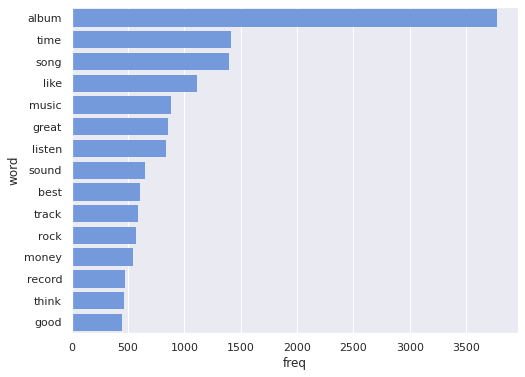

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.barplot( x='freq', y='word', data=df_frequency[0:15] ,color='cornflowerblue', linewidth=0)

# Reviews readability, sentiment and complexity analysis

Textblob library is used for sentiment analysis.
The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [22]:
from textblob import TextBlob

def get_polarity(text):
    text_blob = TextBlob(text)
    return text_blob.sentiment.polarity

def get_subjectivity(text):
    text_blob = TextBlob(text)
    return text_blob.sentiment.subjectivity

Textstat library is used for readability and complexity analysis.

In [23]:
!pip install textstat
import textstat
from nltk.corpus import stopwords

stop_words = stopwords.words('english')


def get_readability(text):
    """
    Score	     Understood by
    4.9 or    lower average 4th-grade student or lower
    5.0–5.9	  average 5th or 6th-grade student
    6.0–6.9	  average 7th or 8th-grade student
    7.0–7.9	  average 9th or 10th-grade student
    8.0–8.9	  average 11th or 12th-grade student
    9.0–9.9	  average 13th to 15th-grade (college) student  
    """
    score = textstat.dale_chall_readability_score(text)
    return score

def get_reading_ease(text):
    """
    Score	  Difficulty
    90-10	  Very Easy
    80-89	  Easy
    70-79	  Fairly Easy
    60-69	  Standard
    50-59	  Fairly Difficult
    30-49	  Difficult
    0-29	  Very Confusing
    """
    score = textstat.flesch_reading_ease(text)
    return score


def get_difficult_words(text):
    """
    returns number of words considered difficult in input text
    """
    score = textstat.difficult_words(text)
    return score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
def extract_features(df,col):
    """
    count: number of words in input text
    char count: number of chars in input text
    """
    
    df['polarity'] = df[col].apply(lambda x:get_polarity(x)) 
    df['subjectivity'] = df[col].apply(lambda x:get_subjectivity(x)) 
    
    df['readability_score'] = df[col].apply(lambda x:get_readability(x)) 
    df['reading_ease'] = df[col].apply(lambda x: get_reading_ease(x))
    df['difficult_words'] = df[col].apply(lambda x:get_difficult_words(x)) 
    
    
    df['count']= df[col].apply(lambda x: len(str(x).split()))
    df['char count']= df[col].apply(lambda x: len(x))

In [25]:
extract_features(reviews,'translated_reviews')

In [26]:
reviews.sample(2)

,Review,language,translated_reviews,preprocessed_reviews,polarity,subjectivity,readability_score,reading_ease,difficult_words,count,char count
840,for me is only us and them!,en,for me is only us and them!,[],0.000000,1.000000,0.35,106.67,0,7,27
73,"its nothing special on its own but when you consider the decades of lavish praise and idolizing by people who have never heard music any more ""experimental"" than this its hard to not be harsh on it",en,"its nothing special on its own but when you consider the decades of lavish praise and idolizing by people who have never heard music any more ""experimental"" than this its hard to not be harsh on it","[special, consid, decad, lavish, prais, idol, peopl, hear, music, experiment, hard, harsh]",0.177579,0.618849,8.46,50.84,5,37,197


In [27]:
reviews.insert(1, 'rating', df['Rating'])
reviews._get_numeric_data().columns

Index(['rating', 'polarity', 'subjectivity', 'readability_score',
       'reading_ease', 'difficult_words', 'count', 'char count'],
      dtype='object')

In [28]:
def print_average_scores(df):
    for col in reviews._get_numeric_data().columns:
        print('Average '+ str(col)+':',df[col].mean())
                
print_average_scores(reviews)

Average rating: 4.393574297188755
Average polarity: 0.26532106702030545
Average subjectivity: 0.5273205295014968
Average readability_score: 8.820515394912984
Average reading_ease: 71.8389625167336
Average difficult_words: 19.859437751004016
Average count: 137.85140562248995
Average char count: 763.3507362784471


# Plotting distributions

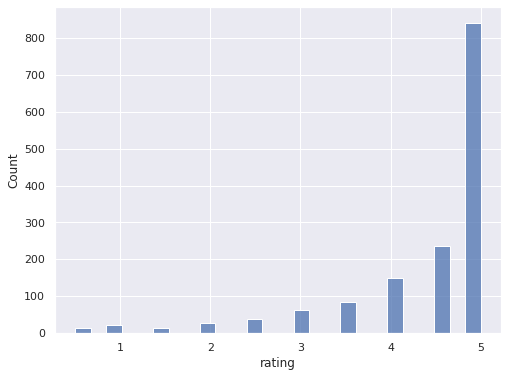

In [29]:
sns.set(rc={"figure.figsize": (8, 6)})
sns.histplot(reviews.rating)

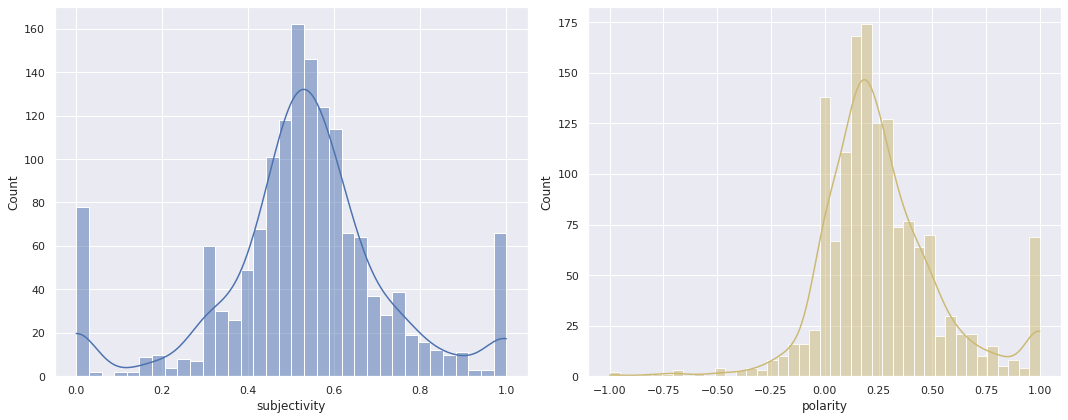

In [30]:
import seaborn as sns

x1, x2 =  reviews.subjectivity, reviews.polarity

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)


sns.histplot(x1, kde=True, ax=ax1)
sns.histplot(x2, kde=True, ax=ax2, color="y")
plt.tight_layout()


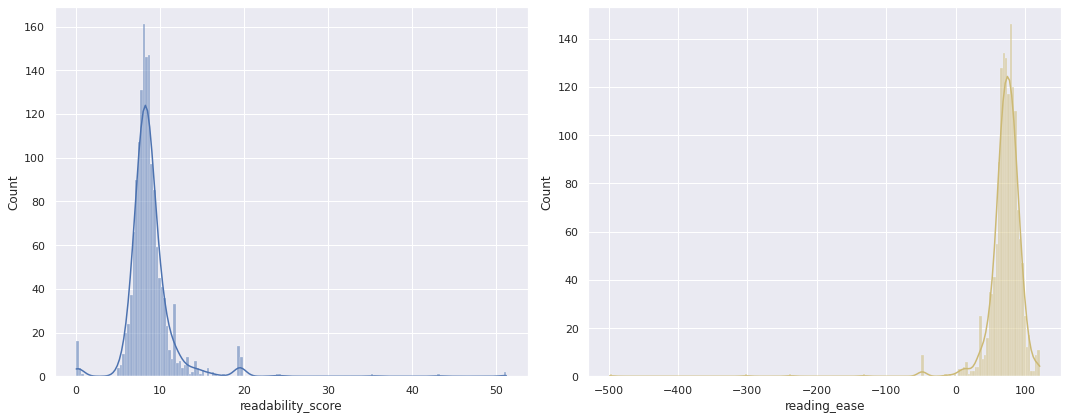

In [31]:
x3, x4 =  reviews.readability_score, reviews.reading_ease

fig, (ax3, ax4) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)


sns.histplot(x3, kde=True, ax=ax3)
sns.histplot(x4, kde=True, ax=ax4, color="y")
plt.tight_layout()

# Topic modeling

LDA Bag of Words model

In [32]:
dictionary = gensim.corpora.Dictionary(preprocessed_reviews)
i = 0
for (idx, word) in dictionary.iteritems():
    print(idx, word)
    if i > 4:
        break
    i+= 1

0 abl
1 acclaim
2 actual
3 adapt
4 album
5 allow


In [33]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [34]:
bow_corpus = [dictionary.doc2bow(doc) for doc in preprocessed_reviews]

In [35]:
bow_doc_example = bow_corpus[218]
for i in range(len(bow_doc_example)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_example[i][0], 
                                               dictionary[bow_doc_example[i][0]], 
bow_doc_example[i][1]))

Word 10 ("come") appears 1 time.
Word 38 ("listen") appears 1 time.
Word 63 ("think") appears 2 time.
Word 108 ("minut") appears 1 time.
Word 146 ("time") appears 1 time.
Word 218 ("record") appears 1 time.
Word 248 ("eclips") appears 2 time.
Word 250 ("entir") appears 1 time.
Word 256 ("life") appears 1 time.
Word 555 ("total") appears 2 time.
Word 632 ("headphon") appears 1 time.
Word 667 ("watch") appears 1 time.


In [36]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2, workers=2)

In [37]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.039*"time" + 0.029*"song" + 0.017*"like" + 0.015*"great" + 0.014*"money" + 0.011*"music" + 0.010*"rock" + 0.010*"listen" + 0.010*"sound" + 0.009*"work"
Topic: 1 
Words: 0.021*"best" + 0.020*"time" + 0.019*"music" + 0.015*"like" + 0.015*"hear" + 0.015*"great" + 0.012*"listen" + 0.011*"rock" + 0.010*"sound" + 0.008*"band"
Topic: 2 
Words: 0.031*"song" + 0.026*"like" + 0.019*"great" + 0.019*"time" + 0.017*"track" + 0.016*"sound" + 0.015*"music" + 0.012*"listen" + 0.011*"rock" + 0.011*"good"
Topic: 3 
Words: 0.030*"listen" + 0.023*"time" + 0.020*"music" + 0.017*"song" + 0.016*"record" + 0.013*"best" + 0.013*"think" + 0.013*"like" + 0.011*"dont" + 0.009*"year"


In [38]:
!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# # Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model, bow_corpus, dictionary)
LDAvis_prepared

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.020365 -0.001314       1        1  37.874306
0      0.023938 -0.000970       2        1  26.548205
3     -0.024417 -0.021051       3        1  22.491926
1     -0.019885  0.023335       4        1  13.085563, topic_info=       Term         Freq        Total Category  logprob  loglift
8      best   602.000000   602.000000  Default  30.0000  30.0000
38   listen   857.000000   857.000000  Default  29.0000  29.0000
146    time  1396.000000  1396.000000  Default  28.0000  28.0000
39    music   880.000000   880.000000  Default  27.0000  27.0000
31     hear   421.000000   421.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
120    play    39.241072   258.763060   Topic4  -5.2254   0.1475
218  record    48.553021   483.616840   Topic4  -5.0125  -0.2650
256    life    39.790559   307.927536   Topic4  -5.2115  -0.0126
133    song    60.065118  1355.763481   Topic4  -4.7997  -1.0830
25     feel    39.319682   326.870856   Topic4  -5.2234  -0.0842

[291 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
661       1  0.243878     abil
661       2  0.146327     abil
661       3  0.438981     abil
661       4  0.146327     abil
241       1  0.344444  absolut
...     ...       ...      ...
290       4  0.118607    write
65        1  0.301087     year
65        2  0.157546     year
65        3  0.392113     year
65        4  0.150544     year

[764 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 4, 2])

LDA Tf-Idf model


In [39]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf 

In [40]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=4)
# # Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = gensimvis.prepare(lda_model_tfidf, corpus_tfidf, dictionary)
LDAvis_prepared

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.000931 -0.024328       1        1  43.525888
0     -0.023935  0.012861       2        1  32.515141
1      0.024866  0.011468       3        1  23.958971, topic_info=           Term       Freq      Total Category  logprob  loglift
333    greatest  32.000000  32.000000  Default  30.0000  30.0000
316     classic  31.000000  31.000000  Default  29.0000  29.0000
29        great  46.000000  46.000000  Default  28.0000  28.0000
8          best  56.000000  56.000000  Default  27.0000  27.0000
279  masterpiec  29.000000  29.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
162      better   5.754124  21.961250   Topic3  -5.5127   0.0895
233       track   6.371116  32.547211   Topic3  -5.4108  -0.2021
291      beauti   5.110377  16.561129   Topic3  -5.6313   0.2530
203       money   5.414610  30.661255   Topic3  -5.5735  -0.3051
55          say   5.173903  25.459089   Topic3  -5.6190  -0.1646

[228 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         1  0.311433      abl
0         2  0.155716      abl
0         3  0.467149      abl
241       1  0.206778  absolut
241       2  0.413555  absolut
...     ...       ...      ...
305       2  0.233220    worst
305       3  0.699661    worst
65        1  0.565259     year
65        2  0.260889     year
65        3  0.173926     year

[449 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

K-means Tf-Idf model

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stop_words = set(STOPWORDS)

stop_words.update(['isnt', 'probably',  'still','one', 'us', 'dont',
                   'pink','floyd','album','albums','time','floyds','really','moon','dark','say','side']) #adding custom stopwords and most common words appearing in every cluster


vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(reviews['translated_reviews'])
X = X.toarray()

k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
kmeans.fit(X)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  % sorted(inconsistent)


KMeans(max_iter=100, n_clusters=3, n_init=1)

In [72]:
n = 10
print("Top {0} terms per cluster:\n".format(n))
centroids= kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print("Cluster {0}:".format(i)),
    for index in centroids[i, :n]:
        print(terms[index])
    print('\n')


Top 10 terms per cluster:

Cluster 0:
greatest
good
masterpiece
music
classic
overrated
perfect
listen
rock
best


Cluster 1:
great
song
songs
money
music
gig
sky
rock
best
damage


Cluster 2:
best
period
made
flows
think
heard
history
stars
simply
amazing




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NMF Tf-Idf model

In [73]:
from sklearn.decomposition import NMF

nmf  = NMF(n_components = 3)
nmf.fit(X)
for i in range(k):
    print("Cluster {0}:".format(i))
    for index in nmf.components_.argsort()[i,-11:-1]:
        print(terms[index])
    print('\n')


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Cluster 0:
think
even
much
listen
rock
money
good
songs
music
song


Cluster 1:
stars
classic
recorded
heard
simply
flows
amazing
history
made
period


Cluster 2:
heard
change
psychedelic
said
made
band
history
hands
rock
masterpiece




References:

https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

https://jonathansoma.com/lede/algorithms-2017/classes/clustering/k-means-clustering-with-scikit-learn/

https://towardsdatascience.com/topic-model-visualization-using-pyldavis-fecd7c18fbf6